In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

*** 

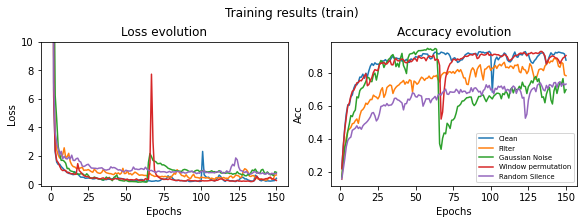

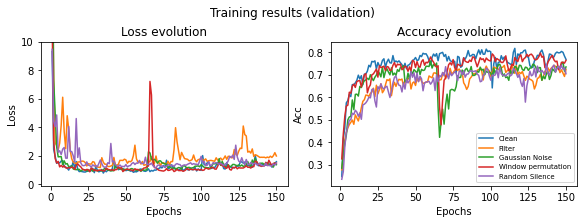

In [2]:
state_dirs = ["test\\clean\\clean_150.pt",
              "test\\filter\\filter_150.pt",
              "test\\gaussian\\gaussian_150.pt",
              "test\\permute\\permute_150.pt",
              "test\\silent\\silent_150.pt",
              ]

n_curves = len(state_dirs)

states = []
for i in range(n_curves):
    states.append(torch.load(state_dirs[i]))

labels =["Clean",
         "Filter",
         "Gaussian Noise",
         "Window permutation",
         "Random Silence",
        ]

fig, (train_loss,train_acc) = plt.subplots(ncols = 2, figsize = (8,3), layout = "constrained")
fig.suptitle("Training results (train)")

for i, state in enumerate(states):
    n_epochs = np.arange(1,len(state["loss"][0]) + 1, 1)
    train_loss.plot(n_epochs , [e.item() for e in state["loss"][0]], label = labels[i])
    train_acc.plot(n_epochs , state["acc"][0], label = labels[i])

train_loss.set_xlabel("Epochs")
train_loss.set_ylabel("Loss")
train_loss.set_title("Loss evolution")
train_loss.set_ylim(bottom= -0.1, top = 10)

train_acc.set_xlabel("Epochs")
train_acc.set_ylabel("Acc")
train_acc.set_title("Accuracy evolution")

plt.legend(fontsize = "x-small")
plt.plot()
plt.savefig("audioplot_train.pdf")

fig, (val_loss,val_acc) = plt.subplots(ncols = 2, figsize = (8,3), layout = "constrained")
fig.suptitle("Training results (validation)")

for i, state in enumerate(states):
    n_epochs = np.arange(1,len(state["loss"][0]) + 1 ,1)
    val_loss.plot(n_epochs , [e.item() for e in state["loss"][1]], label = labels[i])
    val_acc.plot(n_epochs , state["acc"][1], label = labels[i])

val_loss.set_xlabel("Epochs")
val_loss.set_ylabel("Loss")
val_loss.set_title("Loss evolution")
val_loss.set_ylim(bottom= -0.1, top = 10)

val_acc.set_xlabel("Epochs")
val_acc.set_ylabel("Acc")
val_acc.set_title("Accuracy evolution")

plt.legend(fontsize = "x-small")
plt.plot() 
plt.savefig("audioplot_val.pdf")

***

In [17]:
for i, state in enumerate(states):
    print(labels[i])
    # pos = np.argmin([e.item() for e in state["loss"][1]])
    t = state["acc"][0][-1] * 100
    v = state["acc"][1][-1]* 100
    print(f"Train acc {t}")
    print(f"Val acc {v}") 

Clean
Train acc 99.1982820329277
Val acc 93.1310818546079
Filter
Train acc 99.67072297780959
Val acc 84.31597023468804
Gaussian Noise
Train acc 97.1796707229778
Val acc 87.97939324556381
Window permutation
Train acc 99.35576234788833
Val acc 93.53176874642244
Random Silence
Train acc 96.73586256263421
Val acc 89.52489982827704
